# Wordclouds para analise de avaliações online 

Nosso objetivo aqui é extrair informações de textos através de nuvens de palavras, as ditas wordclouds. 
A base que analisarei contém avaliações de compras online brasileiras, e está disponivel publicamente no Kaggle (https://www.kaggle.com/olistbr/brazilian-ecommerce)
De começo temos que importar os pacotes nescessarios, pandas para administrar as bases, matplotlib e seaborn para gerar os gráficos e algumas funções do pacote wordcloud para gerar a nuvem. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Importo a base e vejo as primeiras linhas, vemos que ela tem algumas chaves de cruzamento com outras bases, não estamos interessados nisso no momento, além disso temos a nota numérica da compra, o titulo da avaliação e seu conteudo.

In [3]:
avaliacoes  = pd.read_csv('olist_order_reviews_dataset.csv')

avaliacoes.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Para analisar textos é uma boa pratica retirar acentos,maiusculas e o que for nescessario para assim conseguir agrupar a mesma palavra escrita de diferentes formas.
Então, listo as colunas de texto que irei corrigir e uso a função lambda, para tratar cada linha

In [4]:
cols = ['review_comment_message', 'review_comment_title']
avaliacoes[cols] = avaliacoes[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.lower())
avaliacoes.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,parabens lojas lannister adorei comprar pela i...,2018-03-01 00:00:00,2018-03-02 10:26:53


Vamos avaliar primeiro o texto da avaliação em si, para isso eu desprezo as linhas que não contem avaliação em texto, e crio a variavel text concatenando todas as avaliações  e conto quantas palavras tem.

In [5]:
texto = avaliacoes['review_comment_message'].dropna()
text = " ".join(review for review in texto)
print ("Temos {} palavras na combinação de todas avaliações.".format(len(text)))

Temos 2965364 palavras na combinação de todas avaliações.


Já podemos fazer nossa primeira nuvem de palavras!
Vamos usar a função WordCloud, importada anteriormente, para gerar o corpus wordcloud utilizando a lista de palavras.

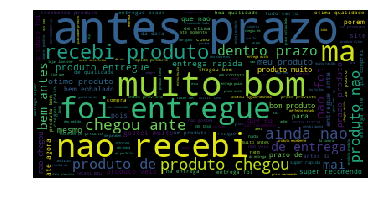

In [6]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Muito legal!
Mas ficou pequeno e com umas cores que não da para ver, então vou setar o background_color para white, além das proporções (width é a largura, e height é a altura) para 20x10

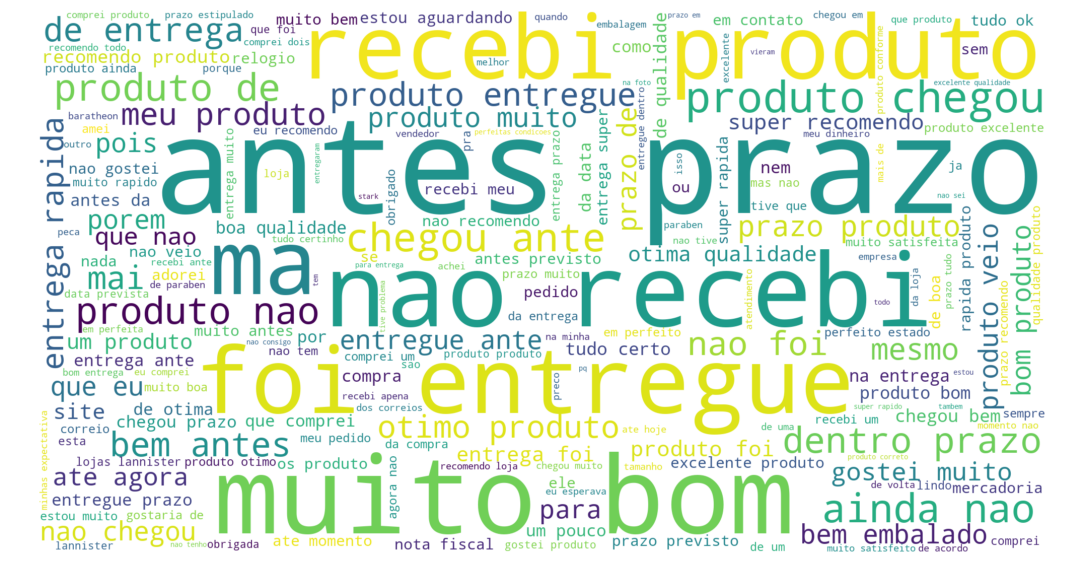

In [7]:
# Generate a word cloud image
wordcloud = WordCloud(width=2000, height=1080, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Agora da para ver melhor! Mas tem algumas palavras no meio que não dizem muita coisa como por exemplo 'que', 'em', 'estou', entre outras, são as ditas stop words. Para retira-las da nuvem, vamos usar a função stopwords:

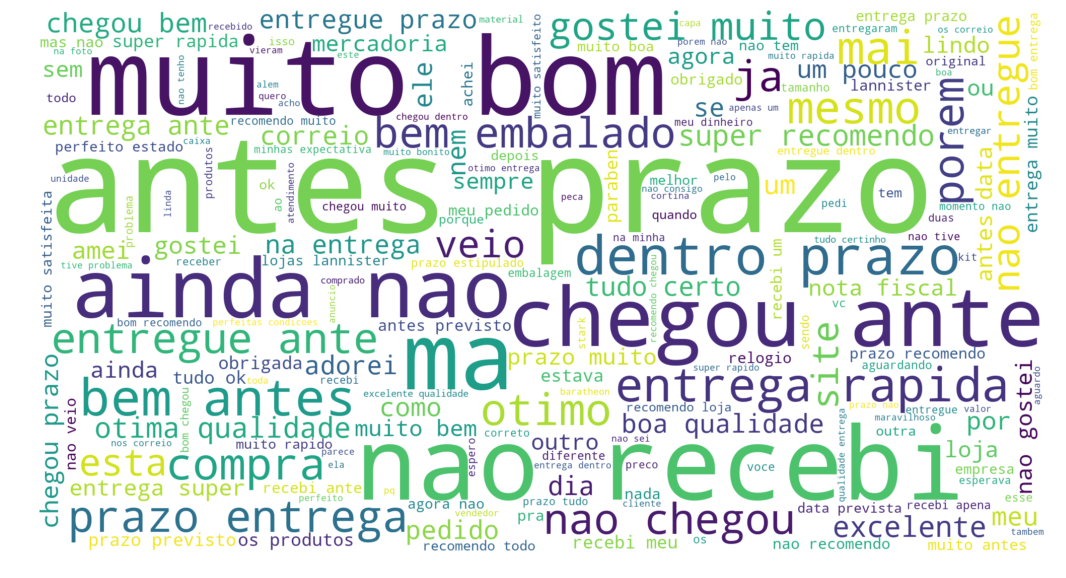

In [8]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["da","para","comprei","pois", "mesmo" "que", "em", "estou", "o", "a", "de", "do", 'sao', 'dos', 'santo', 'santa', 'foi', 'produto', 'são', 'que', 'eu', 'ate', 'até'])

# Generate a word cloud image
wordcloud = WordCloud(width=2000, height=1080,stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Agora sim! Na nuvem se destacam termos referentes à entrega e palavras diretivas se a pessoa recomenda ou não. Podemos fazer a mesma coisa para os titulos das avaliações e comparar entre si:

Temos 152172 palavras na combinação de todas avaliações.


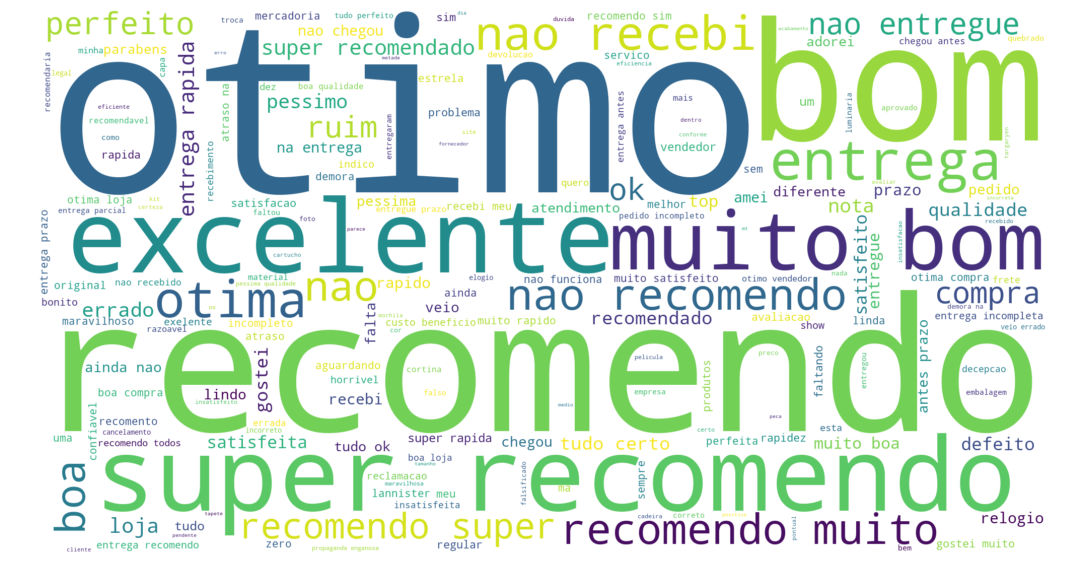

In [9]:
texto = avaliacoes['review_comment_title'].dropna()
text = " ".join(review for review in texto)
print ("Temos {} palavras na combinação de todas avaliações.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["da","para","comprei","pois", "mesmo" "que", "em", "estou", "o", "a", "de", "do", 'sao', 'dos', 'santo', 'santa', 'foi', 'produto', 'são', 'que', 'eu', 'ate', 'até'])

# Generate a word cloud image
wordcloud = WordCloud(width=2000, height=1080,stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
# Quantidade de palavras no texto/ Quantidade de palavras no titulo
quociente =  int(2965364/ 152172)
print ("Temos {} vezes mais palavras no texto do que no titulo.".format(quociente))

Temos 19 vezes mais palavras no texto do que no titulo.


Nos titulos as pessoas são mais diretas ainda, usam 20 vezes menos palavras, e falam de maneira bem direta se gostou um não.

Agora que entendemos o que é dito nas avaliações, podemos olhar a distribuição do valor numérico das notas com um histograma

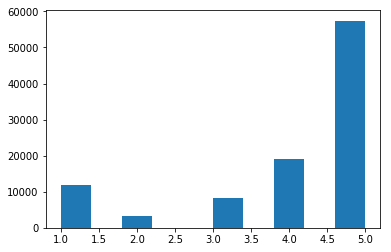

In [11]:
avaliacoes['review_score'].hist( grid = False)

Vemos que a grande maioria das avaliações são positivas!

Outra coisa interessante é correlacionar as palavras da avaliação com a nota, para isso primeiramente vou separar a base pela nota e criar uma lista dessas bases para iterar nelas:

In [12]:
avaliacoes_5 = avaliacoes[avaliacoes['review_score']==5]
avaliacoes_4 = avaliacoes[avaliacoes['review_score']==4]
avaliacoes_3 = avaliacoes[avaliacoes['review_score']==3]
avaliacoes_2 = avaliacoes[avaliacoes['review_score']==2]
avaliacoes_1 = avaliacoes[avaliacoes['review_score']==1]

In [24]:
promotores = avaliacoes[avaliacoes['review_score']==5].count()[0]
detratores =avaliacoes[avaliacoes['review_score']<4].count()[0]
total = avaliacoes.count()[0]
NPS = (promotores-detratores)/total
NPS

0.3404

In [12]:
lista_de_bases = [avaliacoes_5, avaliacoes_4, avaliacoes_3, avaliacoes_2, avaliacoes_1]

Faço agora os mesmos procedimentos para transformar numa string com todas palavras, então crio um dataset splitando cada uma dessas palavras para uma linha, renomeio essa coluna e crio uma coluna flag. Com essa flag eu somo e tenho a quantidade de palavras que tem em todas avaliações com essa nota, e faço um grafico do top7 palavras ordenando da mais incidente para a menos incidente. Obtemos:

11193

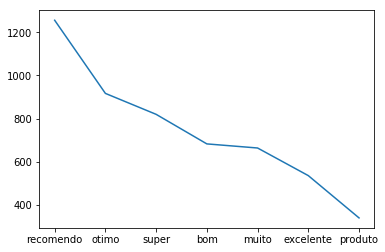

2944

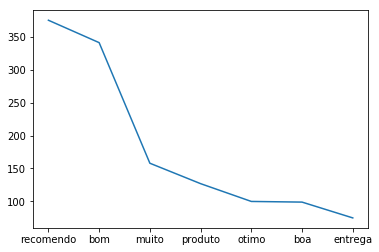

1758

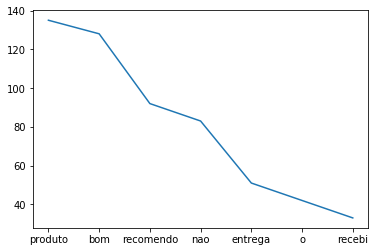

1184

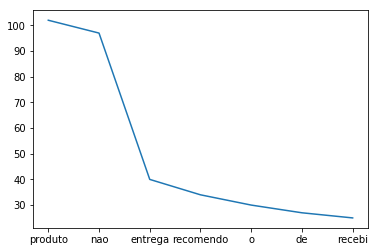

4921

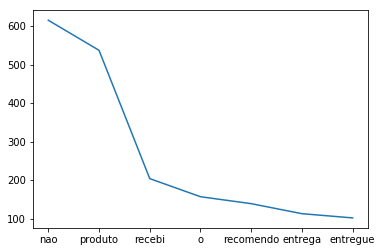

In [13]:
for base in lista_de_bases:
    texto = base['review_comment_title'].dropna()
    text = " ".join(review for review in texto)
    lista = pd.DataFrame(text.split())
    lista.columns = ['palavras']
    lista['flag']=1
    display(lista['flag'].sum())
#     display(lista.groupby('palavras').count().sort_values(by = 'flag', ascending = False).head(20))
    plt.plot(lista.groupby('palavras').count().sort_values(by = 'flag', ascending = False).head(7))
    plt.show()

O conceito de NPS ( Net Promoter Score) fica evidente, quem avalia em 5 será um promotor e na propria avaliação ele diz que 'recomenda' combinado com palavras bastante positivas, quem avalia em 4 ficará neutro, vemos que usam muito as palavras 'não' e 'recomendo', logo alguns recomendarão e outros não, por fim quem dá de 3 para baixo provavelmente ficou descontente com o recebimento da encomenda e vai ser propaganda negativa para seu negócio.

In [32]:
promotores = avaliacoes[avaliacoes['review_score']==5].count()[0]
detratores = avaliacoes[avaliacoes['review_score']<4].count()[0]
total = avaliacoes.count()[0]
NPS = (promotores-detratores)/total
NPS

0.3404